In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open('data/activities/feca318d-80b2-4eaa-b5a5-564421dc735e.json', 'r') as file:
    data = json.load(file)

In [10]:
data

{'id': 'feca318d-80b2-4eaa-b5a5-564421dc735e',
 'type': 'run',
 'app_id': 'com.nike.sport.running.droid',
 'start_epoch_ms': 1720639104429,
 'end_epoch_ms': 1720640807516,
 'last_modified': 1720641811108,
 'active_duration_ms': 1683000,
 'session': False,
 'delete_indicator': False,
 'summaries': [{'metric': 'steps',
   'summary': 'total',
   'source': 'com.nike.running.android.fullpower',
   'app_id': 'com.nike.sport.running.droid',
   'value': 4410},
  {'metric': 'speed',
   'summary': 'mean',
   'source': 'com.nike.running.android.fullpower',
   'app_id': 'com.nike.sport.running.droid',
   'value': 10.859320593177463},
  {'metric': 'nikefuel',
   'summary': 'mean',
   'source': 'com.nike.nikefuelengine.1.0-A5.0',
   'app_id': 'com.nike.sport.running.droid',
   'value': 47.838125872358546},
  {'metric': 'nikefuel',
   'summary': 'total',
   'source': 'com.nike.nikefuelengine.1.0-A5.0',
   'app_id': 'com.nike.sport.running.droid',
   'value': 1341.8594307196572},
  {'metric': 'distanc

In [3]:
pd.DataFrame(data['summaries'])

,metric,summary,source,app_id,value
0,steps,total,com.nike.running.android.fullpower,com.nike.sport.running.droid,4410.000000
1,speed,mean,com.nike.running.android.fullpower,com.nike.sport.running.droid,10.859321
2,nikefuel,mean,com.nike.nikefuelengine.1.0-A5.0,com.nike.sport.running.droid,47.838126
3,nikefuel,total,com.nike.nikefuelengine.1.0-A5.0,com.nike.sport.running.droid,1341.859431
4,distance,total,com.nike.running.android.fullpower,com.nike.sport.running.droid,5.076732
5,rpe,max,com.nike.running.manualentry,com.nike.sport.running.droid,8.000000
6,pace,mean,com.nike.running.android.fullpower,com.nike.sport.running.droid,5.525208
7,calories,total,com.nike.running.android.fullpower,com.nike.sport.running.droid,375.760000


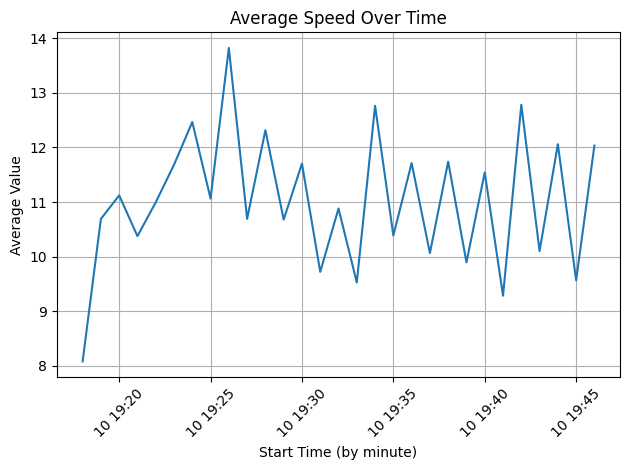

In [95]:
speed = pd.DataFrame(data['metrics'][2]['values'])
speed['start_epoch_ms'] = pd.to_datetime(speed['start_epoch_ms'], unit='ms').dt.to_period('T')
speed['end_epoch_ms'] = pd.to_datetime(speed['end_epoch_ms'], unit='ms').dt.to_period('T')

speed['start_epoch_ms'] = speed['start_epoch_ms'].dt.to_timestamp()
speed = pd.DataFrame(speed.groupby('start_epoch_ms')['value'].mean()).reset_index()

# Corrigindo a ordem dos eixos no plot
plt.plot(speed['start_epoch_ms'], speed['value'])

# Melhorar a visualização
plt.xlabel('Start Time (by minute)')
plt.ylabel('Average Value')
plt.title('Average Speed Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [33]:
metrics = [i['type'] for i in data['metrics']]
metrics

['distance',
 'steps',
 'speed',
 'rpe',
 'calories',
 'latitude',
 'longitude',
 'horizontal_accuracy',
 'pace',
 'nikefuel']

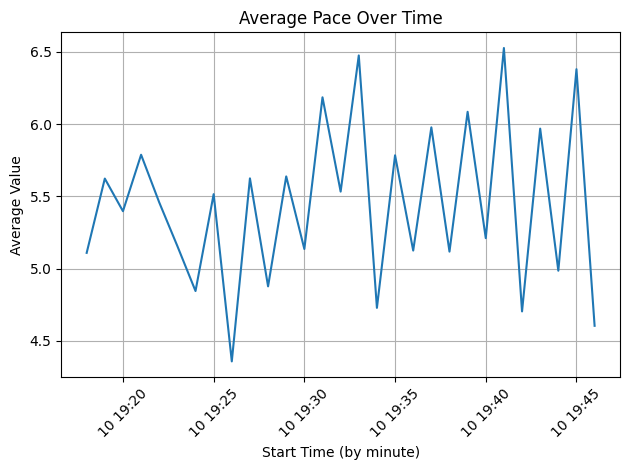

In [49]:
pace = pd.DataFrame(data['metrics'][8]['values'])

pace['start_epoch_ms'] = pd.to_datetime(pace['start_epoch_ms'], unit='ms').dt.to_period('T')

pace['start_epoch_ms'] = pace['start_epoch_ms'].dt.to_timestamp()
pace = pd.DataFrame(pace.groupby('start_epoch_ms')['value'].mean()).reset_index()

# Corrigindo a ordem dos eixos no plot
plt.plot(pace['start_epoch_ms'], pace['value'])

# Melhorar a visualização
plt.xlabel('Start Time (by minute)')
plt.ylabel('Average Value')
plt.title('Average Pace Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

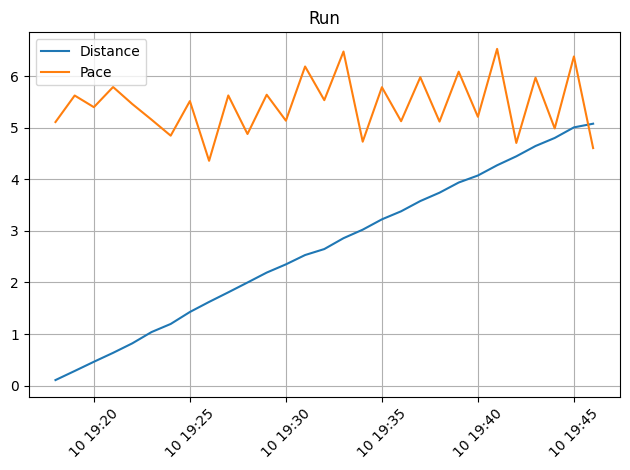

In [90]:
distance = pd.DataFrame(data['metrics'][0]['values'])
distance['start_epoch_ms'] = pd.to_datetime(distance['start_epoch_ms'], unit='ms').dt.to_period('T')

distance = pd.DataFrame(distance.groupby(['start_epoch_ms'])['value'].sum()).reset_index()
distance['start_epoch_ms'] = distance['start_epoch_ms'].dt.to_timestamp()
distance['cum_value'] = distance['value'].cumsum()

plt.plot(distance['start_epoch_ms'], distance['cum_value'], label='Distance')
plt.plot(pace['start_epoch_ms'], pace['value'], label='Pace')

# Melhorar a visualização
# plt.xlabel('Start Time (by minute)')
# plt.ylabel('Distance')
plt.title('Run')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

In [153]:
# speed
speed = pd.DataFrame(data['metrics'][2]['values'])
speed['start_epoch_ms'] = pd.to_datetime(speed['start_epoch_ms'], unit='ms').dt.to_period('T')
speed['start_epoch_ms'] = speed['start_epoch_ms'].dt.to_timestamp()
speed = pd.DataFrame(speed.groupby('start_epoch_ms')['value'].mean()).reset_index()
speed.rename(columns={'value':'speed'}, inplace=True)
speed = speed[['start_epoch_ms', 'speed']]

# pace
pace = pd.DataFrame(data['metrics'][8]['values'])
pace['start_epoch_ms'] = pd.to_datetime(pace['start_epoch_ms'], unit='ms').dt.to_period('T')
pace['start_epoch_ms'] = pace['start_epoch_ms'].dt.to_timestamp()
pace = pd.DataFrame(pace.groupby('start_epoch_ms')['value'].mean()).reset_index()
pace.rename(columns={'value':'pace'}, inplace=True)
pace = pace[['start_epoch_ms', 'pace']]

# distance
distance = pd.DataFrame(data['metrics'][0]['values'])
distance['start_epoch_ms'] = pd.to_datetime(distance['start_epoch_ms'], unit='ms').dt.to_period('T')
distance = pd.DataFrame(distance.groupby(['start_epoch_ms'])['value'].sum()).reset_index()
distance.rename(columns={'value':'distance'}, inplace=True)
distance['start_epoch_ms'] = distance['start_epoch_ms'].dt.to_timestamp()
distance['cum_distance'] = distance['distance'].cumsum()
distance = distance[['start_epoch_ms', 'distance', 'cum_distance']]

df_run = speed.merge(pace, on='start_epoch_ms').merge(distance, on='start_epoch_ms')
df_run['km'] = np.floor(df_run['cum_distance'])
df_run['time'] = df_run['start_epoch_ms'] - df_run['start_epoch_ms'].min()
df_run['time'] = df_run['time'].apply(lambda x: f"{x.components.minutes:02}:{x.components.seconds:02}")
df_run['date'] = df_run['start_epoch_ms'].dt.date
df_run.drop(columns='start_epoch_ms', inplace=True)
df_run['id'] = data['id']
df_run = df_run[['id', 'date', 'time', 'speed', 'pace', 'distance', 'cum_distance', 'km']]
df_run



,id,date,time,speed,pace,distance,cum_distance,km
0,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,00:00,8.078061,5.108846,0.108852,0.108852,0.0
1,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,01:00,10.690200,5.622891,0.176114,0.284966,0.0
2,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,02:00,11.122286,5.397213,0.178464,0.463430,0.0
3,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,03:00,10.375200,5.787713,0.173026,0.636455,0.0
4,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,04:00,10.994727,5.457901,0.183987,0.820443,0.0
5,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,05:00,11.683500,5.155841,0.218366,1.038808,1.0
6,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,06:00,12.466800,4.844722,0.157401,1.196209,1.0
7,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,07:00,11.064000,5.515034,0.232005,1.428214,1.0
8,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,08:00,13.824000,4.357807,0.194989,1.623203,1.0
9,feca318d-80b2-4eaa-b5a5-564421dc735e,2024-07-10,09:00,10.692000,5.624231,0.186016,1.809219,1.0


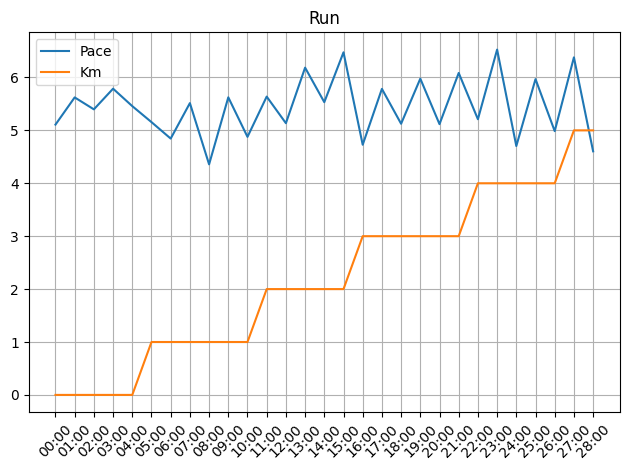

In [143]:
plt.plot(df_run['time'], df_run['pace'], label='Pace')
plt.plot(df_run['time'], df_run['km'], label='Km')

# Melhorar a visualização
# plt.xlabel('Start Time (by minute)')
# plt.ylabel('Distance')
plt.title('Run')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()